##### Homework 2

**Due: Friday, February 21, 11:59 PM**

Harshit Agrawal
9041-1685

# Problem 1 (30 points) - MLE and MAP

Consider i.i.d. data samples $\mathbf{X}=\{x_i\}_{i=1}^N$. Suppose that the data samples are drawn from a Poisson distribution with parameter $\lambda$. The Poisson distribution takes the form $p(x|\lambda) = \frac{\lambda^x e^{-\lambda}}{x!}$.

Complete the following tasks:

1. **(15 points)** Find the MLE estimate for the parameter $\lambda$ assuming a Poisson data likelihood.

2. **(15 points)** Assuming a Gamma distribution as the prior distribution on the parameter $\lambda$, find the MAP estimate for the parameter $\lambda$. The Gamma distribution takes the form $p(\lambda|\alpha,\beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}$.

Show your work.

# Problem 2 (50 points) - Probabilistic Generative Model

## Crab Data Set Description

The **Crab Data Set** has 200 samples and 7 features (Frontal Lip, Rear Width, Length, Width, Depth, Male and Female), describing 5 morphological measurements on 50 crabs each of two color forms and both sexes, of the species *Leptograpsus* variegatus collected at Fremantle, W. Australia.

* **Source:** Campbell, N.A. and Mahon, R.J. (1974) A multivariate study of variation in two species of rock crab of genus *Leptograpsus*. *Australian Journal of Zoology* **22**, 417–425.

The data set is saved in the file **"crab.txt"**: the firt column corresponds to the label (crab species) and the other 7 columns correspond to the features.

Use the **first 140 samples** as **training set** and the **last 60 samples** as **test set**.

## Problem 2 Tasks

Complete the following tasks:


1. **(10 points)** Implement the probabilistic generative classifier, under the assumption that your data likelihood model $p(x|C_j)$ is a multivariate Gaussian and the prior probabilities $p(C_j)$ are dictated by the number of samples $n_j\in\mathbb{R}$ that you have for each class. This classifier is given by comparing the posterior probability for each class $C_j$. We assume that each class $C_j$ can have an arbitrary mean $\mu_j\in\mathbb{R}^{d\times 1}$ and an arbitrary full covariance matrix $\Sigma_j\in\mathbb{R}^{d\times d}$. Both of these quantities are to be estimated from the observations in each class.

2. **(5 points)** Did you encounter any problems when implementing the probabilistic generative model? What is your solution for the problem? Explain why your solution works. (Note: There are more than one solution.) 

3. **(5 points)** Report your classification results in terms of a confusion matrix in both training and test set.

4. **(10 points)** Implement the $k$-Nearest Neighbor ($k$-NN) classifier on the crab data set.

5. **(10 points)** What happens as you vary $k$ from small to large? Why? (Include a plot that shows the performance (error/accuracy) as you vary $k$ for $k$-NN). Test your classifier implementations several times with different parameter settings and using *cross-validation*. 
    
6. **(5 points)** Report your classification results using k-NN in terms of a confusion matrix in both training and test set.

7. **(5 points)** Determine which classifier you would use for the crab data set and give an explanation of your reasoning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from scipy.stats import multivariate_normal
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
data = pd.read_csv("crab.txt", delimiter="\t")

data.head()

,Species,FrontalLip,RearWidth,Length,Width,Depth,Male,Female
0,0,20.6,14.4,42.8,46.5,19.6,1,0
1,1,13.3,11.1,27.8,32.3,11.3,1,0
2,0,16.7,14.3,32.3,37.0,14.7,0,1
3,1,9.8,8.9,20.4,23.9,8.8,0,1
4,0,15.6,14.1,31.0,34.5,13.8,0,1


In [2]:
data=(data-data.min())/(data.max()-data.min())
# data

In [3]:
trainData=data[:140]
testData=data[140:]

In [4]:
def probabilisticGenClassifier(trainData, testData):
 classZero=trainData[trainData['Species']==0][['RearWidth','FrontalLip','Length','Width','Depth','Male']]
 classOne=trainData[trainData['Species']==1][['RearWidth','FrontalLip','Length','Width','Depth','Male']]

 mu0 = np.mean(classZero, axis=0)
 # print('Mean of Class 1: ',mu1)
 cov0 = np.cov(classZero.T)
#  print("cov=",cov0)
 mu1 = np.mean(classOne, axis=0)
 cov1 = np.cov(classOne.T)
 pC0 = classZero.shape[0]/(classZero.shape[0] +classOne.shape[0])
 pC1 = classOne.shape[0]/( classZero.shape[0] + classOne.shape[0])
 X=testData.drop(['Species','Female'], axis=1)
 y0 = multivariate_normal.pdf(X, mean=mu0, cov=cov0)
 y1 = multivariate_normal.pdf(X, mean=mu1, cov=cov1)
    
 pos0 = (y0*pC0)/(y0*pC0 + y1*pC1)
 pos1 = (y1*pC1)/(y0*pC0 + y1*pC1)
    
 estimatedValues = []
 for i in range(0, len(testData)):
    if(pos0[i] >= pos1[i]):
        estimatedValues.append(0)
    else:
        estimatedValues.append(1)
 estimatedValues = np.asarray(estimatedValues)
 actualtestvalue=testData[['Species']]
 actualtestvalue=np.asarray(actualtestvalue)
 tn, fp, fn, tp = confusion_matrix(actualtestvalue, estimatedValues).ravel()
 print("Confusion Matrix : \n",confusion_matrix(actualtestvalue, estimatedValues))  
 count = 0
 for i in range(0, len(estimatedValues)):
    if estimatedValues[i] != actualtestvalue[i]:
        count += 1

 accuracy = (len(estimatedValues) - count)/len(estimatedValues)
 print("accuracy:-",accuracy)
 return accuracy   
probabilisticGenClassifier(trainData, testData)

Confusion Matrix : 
 [[23  5]
 [ 3 29]]
accuracy:- 0.8666666666666667


0.8666666666666667

###### Confusion matrix for all data in k-fold

In [5]:
def performCrossValidationForProbGen(data):
    kf = KFold(n_splits=5)
    crossValidationResults = []
    for train_index, test_index in kf.split(data):
        X_train, X_test = data[train_index[0]:train_index[-1]], data[test_index[0]: test_index[-1]]
        accuracy = probabilisticGenClassifier(X_train, X_test)
        crossValidationResults.append(accuracy)
performCrossValidationForProbGen(trainData)    

Confusion Matrix : 
 [[16  0]
 [ 0 11]]
accuracy:- 1.0
Confusion Matrix : 
 [[11  3]
 [ 0 13]]
accuracy:- 0.8888888888888888
Confusion Matrix : 
 [[10  2]
 [ 1 14]]
accuracy:- 0.8888888888888888
Confusion Matrix : 
 [[11  0]
 [ 0 16]]
accuracy:- 1.0
Confusion Matrix : 
 [[13  2]
 [ 0 12]]
accuracy:- 0.9259259259259259


###### 2nd Part: 
In the crab data set we can see that two features are there for describing gender(having a one for the gender it belongs to and zero for the other).This is resulting in a singular covariance matrix because of the strong correlation between the two columns. One of the possible solution is to remove one of them, So I removed 'Female' feature. As we can see that female feature can be expressed in terms of the male column, as in the male column will have to express this as 0.We are now making sure the determinant of the covariance matrix is not zero, hence eliminating the singularity of the matrix.

###### Confusion matrix of test Set

In [6]:
probabilisticGenClassifier(trainData, testData)

Confusion Matrix : 
 [[23  5]
 [ 3 29]]
accuracy:- 0.8666666666666667


0.8666666666666667

####  𝑘 -Nearest Neighbor ( 𝑘 -NN) 

In [7]:
def knnClassifier(trainData, testData,K):
    trueValueTrain=np.asarray(trainData[['Species']])
    trueValueTest=np.asarray(testData[['Species']])
    trainData=np.asarray(trainData[['RearWidth','FrontalLip','Length','Width','Depth','Male']])
    testData=np.asarray(testData[['RearWidth','FrontalLip','Length','Width','Depth','Male']])
    estimatedValues = []
    for test_row in testData:
        distlist=[]
        for train_row in range(0, len(trainData)):  
            arr1=[]
            arr1.append(test_row)
            arr1.append(trainData[train_row])
            dist= pdist(arr1) 
            distlist.append({'Species':trueValueTrain[train_row][0], 'distance':dist[0]})
        df1 = pd.DataFrame(distlist, columns =['Species','distance'])
        df1=df1.nsmallest(K, 'distance')
        df1=df1['Species'].value_counts()
        specie0=0
        specie1=0
        for specie in df1.index:
            if specie == 0:
                specie0=df1[0]
            if specie ==1:
                specie1=df1[1]
        if specie0>specie1:
           estimatedValues.append(0)
        else:
           estimatedValues.append(1) 
    correct=0
    for i in range(0, len(trueValueTest)): 
        if(trueValueTest[i]==estimatedValues[i]):
           correct+=1
    accuracy=  correct/len(estimatedValues)  
    print("Accuracy:",accuracy)
    print("Confusion Matrix : \n",confusion_matrix(trueValueTest, estimatedValues))
    return accuracy

In [8]:
def plotData(x1,t1,x2=None,t2=None,x3=None,t3=None,legend=[]):
    p1 = plt.plot(x1, t1, 'b') #plot training data
    if(x2 is not None):
        p2 = plt.plot(x2, t2, 'g') #plot true value
    if(x3 is not None):
        p3 = plt.plot(x3, t3, 'r') #plot training data

    #add title, legend and axes labels
    plt.ylabel('Error/Accuracy') #label x and y axes
    plt.xlabel('K Value')
    if(x2 is None):
        plt.legend((p1[0]),legend)
    if(x3 is None):
        plt.legend((p1[0],p2[0]),legend)
    else:
        plt.legend((p1[0],p2[0],p3[0]),legend)

K: 1
Accuracy: 0.9
Confusion Matrix : 
 [[25  3]
 [ 3 29]]
K: 3
Accuracy: 0.8166666666666667
Confusion Matrix : 
 [[21  7]
 [ 4 28]]
K: 5
Accuracy: 0.8166666666666667
Confusion Matrix : 
 [[23  5]
 [ 6 26]]
K: 7
Accuracy: 0.7833333333333333
Confusion Matrix : 
 [[19  9]
 [ 4 28]]
K: 9
Accuracy: 0.65
Confusion Matrix : 
 [[14 14]
 [ 7 25]]
K: 11
Accuracy: 0.6833333333333333
Confusion Matrix : 
 [[16 12]
 [ 7 25]]
K: 13
Accuracy: 0.6333333333333333
Confusion Matrix : 
 [[15 13]
 [ 9 23]]
K: 15
Accuracy: 0.6166666666666667
Confusion Matrix : 
 [[15 13]
 [10 22]]
K: 17
Accuracy: 0.6
Confusion Matrix : 
 [[15 13]
 [11 21]]


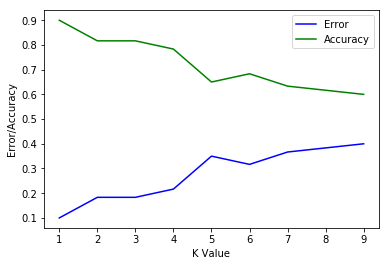

In [9]:
val=[1,3,5,7,9,11,13,15,17]
acc=[]
for k in val:
    print("K:",k)
    accuracy=knnClassifier(trainData, testData,k)
    acc.append(accuracy)
accuracy = acc
error = np.ones(len(accuracy)) - accuracy
# performance=error/accuracy
x1 = range(1,10)
graph = plt.figure("KNN")
plotData(x1, error, x1, accuracy, None, None, ['Error', 'Accuracy'])

###### 5th Part:
The least value of k suggests that we are trying to overfit the data, and it does not perform well on the unseen test data in this scenario. If we increase the k to a very large value, it will result in all or majority of the data points belonging to a single class and will also result in very poor predictions on the test data. Therefore, it is necessary to have an optimal value of k that we can obtain through cross-validation

In [10]:
def performCrossValidationForKnn(data,k):
    kf = KFold(n_splits=5)
    crossValidationResults = []
    print("\nParameter K",k)
    fold=0
    for train_index, test_index in kf.split(data):
        X_train, X_test = data[train_index[0]:train_index[-1]], data[test_index[0]: test_index[-1]]
        fold+=1
        print("Fold",fold)
        accuracy = knnClassifier(X_train, X_test,k)
        crossValidationResults.append(accuracy)
val=[1,3,5,7,9,11,13,15,17]
for k in val:        
  performCrossValidationForKnn(trainData,k)   


Parameter K 1
Fold 1
Accuracy: 0.9629629629629629
Confusion Matrix : 
 [[16  0]
 [ 1 10]]
Fold 2
Accuracy: 1.0
Confusion Matrix : 
 [[14  0]
 [ 0 13]]
Fold 3
Accuracy: 1.0
Confusion Matrix : 
 [[12  0]
 [ 0 15]]
Fold 4
Accuracy: 1.0
Confusion Matrix : 
 [[11  0]
 [ 0 16]]
Fold 5
Accuracy: 0.9629629629629629
Confusion Matrix : 
 [[14  1]
 [ 0 12]]

Parameter K 3
Fold 1
Accuracy: 0.7777777777777778
Confusion Matrix : 
 [[12  4]
 [ 2  9]]
Fold 2
Accuracy: 0.9629629629629629
Confusion Matrix : 
 [[13  1]
 [ 0 13]]
Fold 3
Accuracy: 0.9629629629629629
Confusion Matrix : 
 [[12  0]
 [ 1 14]]
Fold 4
Accuracy: 1.0
Confusion Matrix : 
 [[11  0]
 [ 0 16]]
Fold 5
Accuracy: 0.9259259259259259
Confusion Matrix : 
 [[13  2]
 [ 0 12]]

Parameter K 5
Fold 1
Accuracy: 0.7777777777777778
Confusion Matrix : 
 [[12  4]
 [ 2  9]]
Fold 2
Accuracy: 0.9259259259259259
Confusion Matrix : 
 [[12  2]
 [ 0 13]]
Fold 3
Accuracy: 0.8148148148148148
Confusion Matrix : 
 [[ 8  4]
 [ 1 14]]
Fold 4
Accuracy: 1.0
Confus

In [11]:
accuracy=knnClassifier(trainData, testData,5)

Accuracy: 0.8166666666666667
Confusion Matrix : 
 [[23  5]
 [ 6 26]]


###### 7th Part:

By observing the cross validation result of both models we can say that PGC performs better than KNN on our dataset as the accuracy of PGC is very high. KNN using Euclidean Distance, with increasing dimensions, KNN is as bad as exhaustive search, because of the curse of dimensionality as The number of distance computations increases exponentially during search when the dimensions of the data increase. Whereas, PGC is more sensitive to the information in sense of feature distribution.As many features are simillar in our datset, Thus PGC is performing better than KNN.     

# Problem 3 (20 points) - Expectation-Maximization (EM) Optimization

Consider a data set with $N$ i.i.d. samples, $\mathbf{X}=\{x_i\}_{i=1}^N$, where samples $\{x_j\}_{j=N-10}^N$ are missing values. Suppose you want to model the data likelihood of this data. Your goal is to optimize the data likelihood of the data $\mathbf{X}$:

$$\arg_{\Theta}\max p(\mathbf{X}|\Theta) = \arg_{\Theta}\max \mathcal{L}^0$$

Complete the following tasks:

1. **(10 points)** Write the observed data likelihood, $\mathcal{L}^0$.

2. **(10 points)** Using EM, introduce hidden latent variables and write the complete data likelihood $\mathcal{L}^c$.

##### Ans

1. The observed likelihood $$\mathcal{L}^0 = \prod_{i=1}^{N-11} p(x_i|\Theta) \prod_{j=N-10}^N \int p(x_j|\Theta) dx_j$$

2. Let's assume z as the latent variable, where $\mathbf{z_i}$ = assignment of datapoint i to it's associated component
$$\mathcal{L}^c = \prod_{i=1}^{N-11} p(x_i|\Theta) \prod_{j=N-10}^N p(z_j|\Theta)$$

## Submit your Solution

Create a PDF of the notebook with your solutions.

Submit the PDF of the notebook to Homework 2 assignment page on Canvas.

* For full credit consideration, make sure all output cells do not show any errors and all code is visible.